# Spatial Proteomics Analysis for CODEX Data

This tutorial provides a comprehensive guide to analyzing spatial proteomics data generated from CODEX (CO-Detection by indEXing) technology. We will cover the following steps:

1. Introduction to CODEX Data
2. Cell Segmentation Using Stardist and QuPath
3. Loading Measurements in Python and Performing Downstream Analysis

### QuPath for Visualization and Analysis
QuPath is an open-source software for bioimage analysis. It provides tools for visualizing and analyzing segmentation results.

Step-by-Step Guide to Using QuPath
Install QuPath:

1. Download and install QuPath from the [official website](https://qupath.github.io/).
2. Install [stardist](https://github.com/qupath/qupath-extension-stardist) for QuPath
3. Follow this [instruction](https://qupath.readthedocs.io/en/0.4/docs/deep/stardist.html) for cell segmentation



In [1]:
#TODO add data

In [2]:
from qimrtraining.utils import Read_CODEX_QuPath
import pandas as pd
import stlearn as st
import anndata as ad
import numpy as np
from pathlib import Path
from PIL import Image
import seaborn as sns
import scanpy as sc

/opt/anaconda3/envs/stimage2/lib/python3.10/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


### Load QuPath output into anndata format

In [3]:
DATA_PATH = Path().resolve().parent / "DATA"
codex_path = DATA_PATH / "CODEX/CODEX_01A_S05.txt"

In [4]:
library_id, adata = Read_CODEX_QuPath(codex_path, parent="tissue_3", library_id="S05_t3")

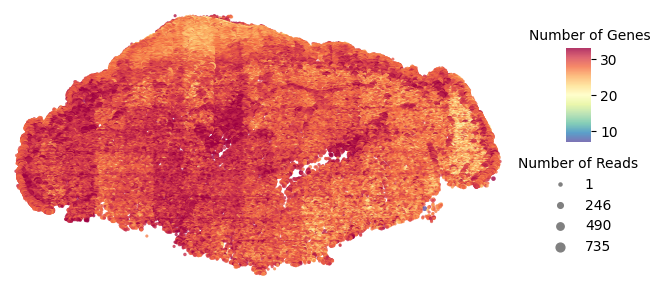

In [5]:
st.pl.QC_plot(adata)

### Preprocessing

In [6]:
sc.pp.filter_cells(adata, min_counts=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata.copy()
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack", n_comps=20)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.3)
adata.write(DATA_PATH / f"{library_id}_processed.h5ad")

2024-05-29 14:00:57.290411: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 14:00:57.293451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 14:00:57.329096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 14:00:57.329124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 14:00:57.329148: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi